# setup path & imports

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from src.sentiment import NewsStockCorrelation
import pandas as pd

news_path = "../data/raw_analyst_ratings.csv"   
stock_path = "../data/Data/AAPL.csv"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


# run pipeline

In [2]:
nsc = NewsStockCorrelation()
result = nsc.run_pipeline(
    news_path=news_path,
    stock_path=stock_path,
    news_date_col="date",    # adjust if different column name in CSV
    stock_date_col="Date",
    sentiment_method="vader", # or 'textblob' or 'both'
    close_col="Close",
    save_merged_to="../data/processed/news_stock_merged.csv"
)

merged = result["merged"]
corr = result["corr"]
daily_sent = result["daily_sentiment"]

print("Correlation results:", corr)
print("Merged sample:")
display(merged.tail())

Correlation results: {'r': 0.04525717478309481, 'p_value': 0.03274867886876777, 'n': 2226}
Merged sample:


,Close,High,Low,Open,Volume,Returns,Cumulative_Returns,sentiment_mean,sentiment_median,n_articles
Date,,,,,,,,,,
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005548,70.466884,NaN,NaN,NaN
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,70.266697,NaN,NaN,NaN
2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,0.000518,70.303094,NaN,NaN,NaN
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,0.002226,70.459607,NaN,NaN,NaN
2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100,-0.005424,70.077426,NaN,NaN,NaN


# plot

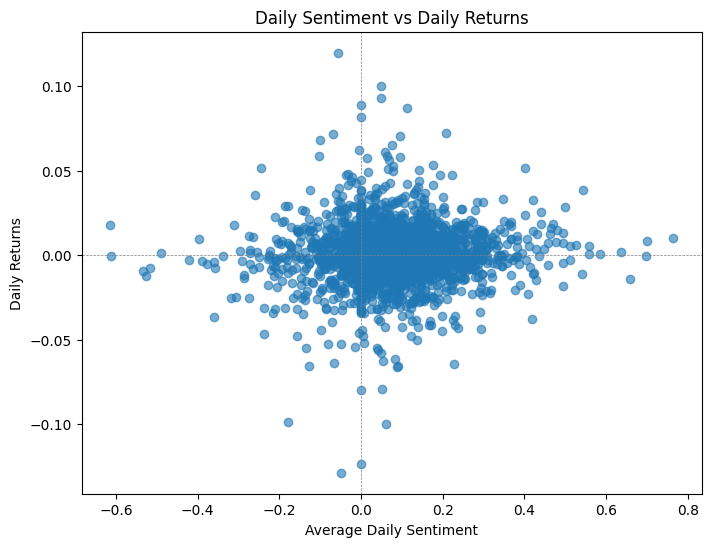

array([<Axes: title={'center': 'Daily Sentiment'}, xlabel='Date'>,
       <Axes: title={'center': 'Daily Returns'}, xlabel='Date'>],
      dtype=object)

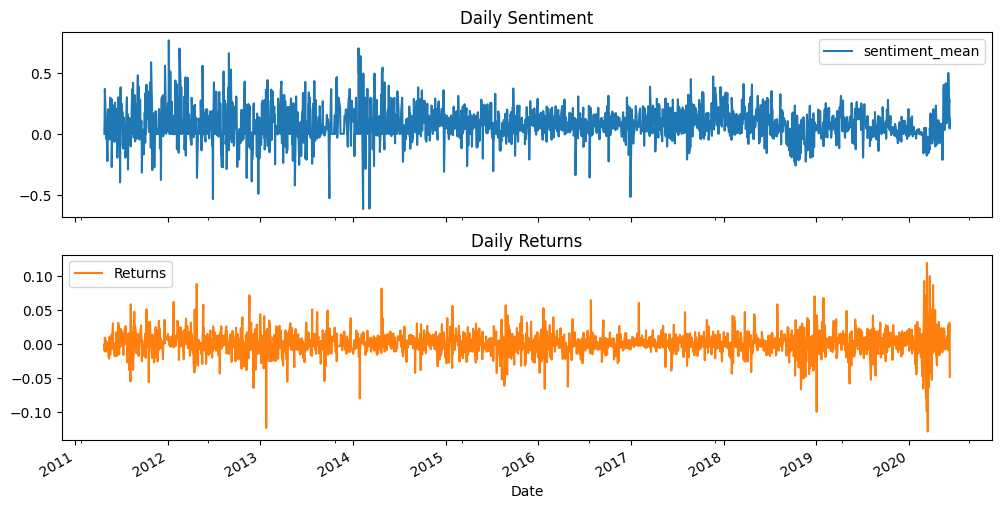

In [3]:
nsc.plot_sentiment_vs_returns(merged)
# optional: look at time series
merged[["sentiment_mean", "Returns"]].dropna().plot(subplots=True, figsize=(12,6), title=["Daily Sentiment", "Daily Returns"])